- Akshada Gaonkar

## The CIFAR-10 dataset

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

Here are the classes in the dataset, as well as 10 random images from each:

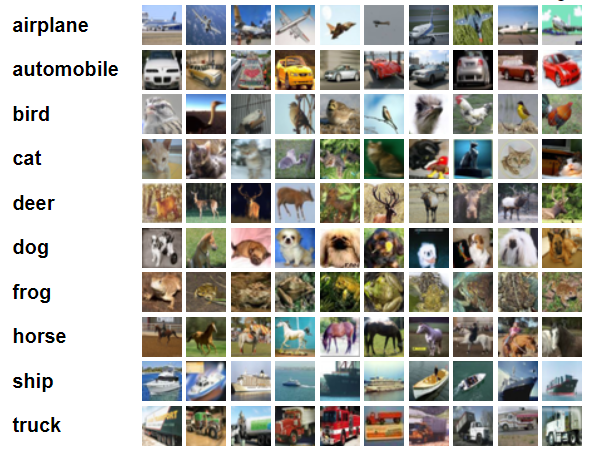

In [1]:
import tensorflow as tf
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
import cv2
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix

In [2]:
(training_images, training_labels), (testing_images, testing_labels) = cifar10.load_data()

In [3]:
print(np.unique(training_labels))
print(len(training_labels))

[0 1 2 3 4 5 6 7 8 9]
50000


In [4]:
training_images.shape

(50000, 32, 32, 3)

In [5]:
labels = {0:'Airplane', 1:'Automobile', 2:'Bird', 3:'Cat',
          4:'Deer', 5:'Dog',6:'Frog',
          7:'Horse', 8:'Ship', 9:'Truck'
        }

### Visualizing training images 

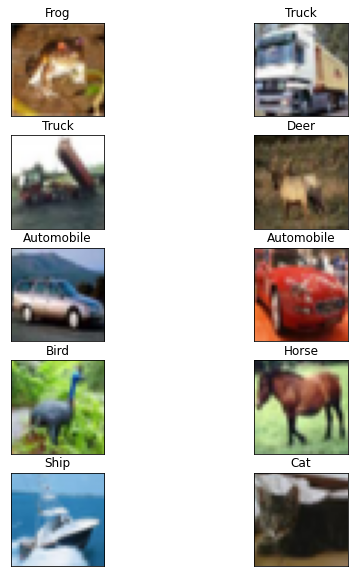

In [32]:
plt.figure(figsize=(8,10))
for i in range(10):
    plt.subplot(5, 2, i+1)
    plt.imshow(training_images[i])
    plt.title(labels[training_labels[i][0]])
    plt.xticks([])
    plt.yticks([])
    
#  print(training_labels[i])
plt.show()

### Normalizing images

In [7]:
training_images = training_images/255
testing_images = testing_images/255

### Model Building

In [33]:
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(32,32,3)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Dense(len(np.unique(training_labels)), activation='softmax'),
])

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        18464     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)              

In [35]:
model.compile(optimizer='RMSprop', loss='sparse_categorical_crossentropy', metrics = ["accuracy"]) 

In [36]:
history = model.fit(training_images, training_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 74s 47ms/step - loss: 1.6405 - accuracy: 0.4086
Epoch 2/10
1563/1563 [==============================] - 79s 50ms/step - loss: 1.2624 - accuracy: 0.5701
Epoch 3/10
1563/1563 [==============================] - 81s 52ms/step - loss: 1.1172 - accuracy: 0.6239
Epoch 4/10
1563/1563 [==============================] - 87s 55ms/step - loss: 1.0365 - accuracy: 0.6563
Epoch 5/10
1563/1563 [==============================] - 77s 50ms/step - loss: 0.9885 - accuracy: 0.6746
Epoch 6/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.9631 - accuracy: 0.6904
Epoch 7/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.9461 - accuracy: 0.6931
Epoch 8/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.9557 - accuracy: 0.6959
Epoch 9/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.9842 - accuracy: 0.69490s - loss: 0.9832 - accuracy
Epoch 10/10
1563/1563 [=============

### Model Performance

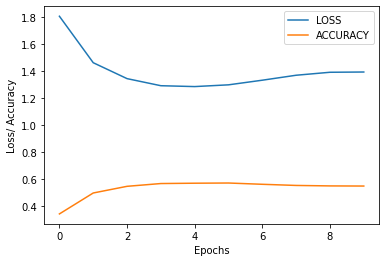

In [19]:
plt.plot(history.history['loss'], label="LOSS")
plt.plot(history.history['accuracy'], label="ACCURACY")
plt.xlabel('Epochs')
plt.ylabel('Loss/ Accuracy')

plt.legend(loc='best')
plt.show()

In [13]:
prob = model.predict(testing_images)
pred = np.argmax(prob, axis=1)

In [14]:
print(accuracy_score(testing_labels, pred))

0.6089


In [15]:
testing_labels=testing_labels.astype('float')
print(log_loss(testing_labels, prob))

1.2019106767521066


### Predictions

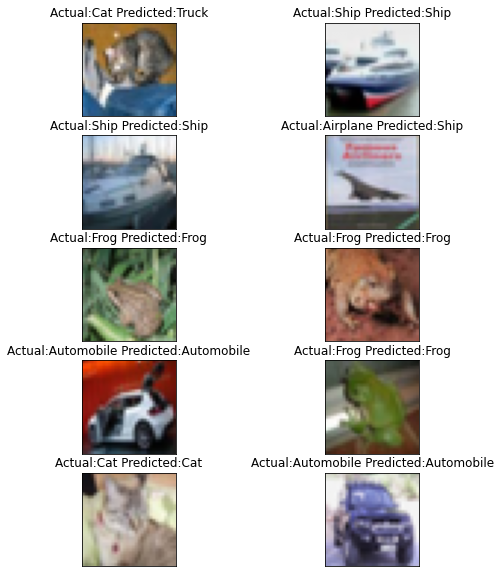

In [31]:
plt.figure(figsize=(8,10))

for i in range(10):
    plt.subplot(5, 2, i+1)
    plt.imshow(testing_images[i])
    string = "Actual:"+ labels[testing_labels[i][0]] + " Predicted:" + labels[pred[i]] 
    plt.title(string)
    plt.xticks([])
    plt.yticks([])
    
plt.show()

In [18]:
#model.save("dl_cifar10_model.h5")